 Bu çalışmada kullanılan veri seti (bank-full.csv), `UCI Makine Öğrenmesi veri deposu`ndan temin edilmiştir <br>
 Veri seti, Portekizli bir bankacılık kurumunun doğrudan pazarlama kampanyaları ile ilgilidir <br>
 Pazarlama kampanyaları `telefon görüşmelerine` dayanmaktadır. <br>
 Ürüne `(banka vadeli mevduatı)` abone olunup olunmayacağına `(“evet” veya “hayır”)` erişmek için genellikle aynı müşteriyle birden fazla temas kurulması gerekmiştir. <br>

 `Bu çalışmanın temel amacı;`müşterilerin banka vadeli mevduatına abone olup olmayacağını öngörmektir <br>
  - Veri setinde toplamda `45211 adet gözlem`, `17 adet nitelik` bulunmaktadır.
  - Bunlardan sonuncusu, müşterini banka vadeli mevduatına `abone olup olmayacağını` gösteren hedef niteliktir `(y)`. `“evet” ve “hayır” `şeklinde iki adet kategorisi bulunmaktadır. Dolayısıyla `ikili sınıflandırma` durumu söz konusudur.
  

|Nitelik|Türkçesi|Veri Tipi|
|-|-|-|
|age (years)|Yaş|Nümerik|
|job|Meslek|Kategorik|
|marital|Medeni durum|Kategorik|
|education|Eğitim seviyesi|Kategorik|
|default|Temerrüde düşmüş kredisi var mı?|Kategorik|
|balance|Yıllık ortalama bakiye (Avro)|Nümerik|
|housing|Konut kredisi var mı?|Kategorik|
|loan|Bireysel kredisi var mı?|Kategorik|
|contact|Müşteri ile iletişim türü|Kategorik|
|day|Ayın müşteri ile son temas günü|Nümerik|
|month|Yılın müşteri ile son temas ayı|Kategorik|
|duration|Müşteri ile iletişim son temas süresi (sn.)|Nümerik|
|campaign|Bu kampanya sırasında müşteri için gerçekleştirilen temas sayısı|Nümerik|
|pdays|Müşteriyle önceki bir kampanyadan en son iletişime geçildikten sonra geçen gün sayısı|Nümerik|
|previous|Bu kampanyadan önce ve bu müşteri için gerçekleştirilen temas sayısı|Nümerik|
|poutcome|Önceki pazarlama kampanyasının sonucu|Kategorik|
|y|Müşteri vadeli bir mevduata abone oldu mu?|Kategorik|


In [74]:
# Çalışma için Gerekli Kütüphanelerin Yüklenmesi
# Bu çalışmada NumPy, Pandas, Scikit-learn ve mixed_naive_bayes kütüphaneleri kullanılmıştır
#  Scikit-learn kütüphanesi yalnızca nümerik veri için (GaussianNB) ve yalnızca kategorik veri için (CategoricalNB) fonksiyon seçenekleri sunmaktadır:ancak bu çalışmadaki veri setinde olduğu gibi aynı anda hem kategorik hem de nümerik nitelikler bir arada bulunabilir.
#  mixed_naive_bayes söz edilen bu iki farklı tür grubun entegrasyonunu, veriye bir arada uygulanabilmesini sağlar.
# Eğer bu kütüphaneler yüklü değilse pip ile terminalden kurulmalıdır.
# Kurulma işlemi yapılmışsa öncelikle aşağıdaki kod satırları Python koduna dahil edilmelidir.

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from mixed_naive_bayes import MixedNB
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [75]:
# Veri Okuma
veriSeti= pd.read_csv("bank-full.csv")
veriSeti.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [76]:
# Veri Ön-işleme
# Veri seti okunduktan sonra hangi niteliklerin kategorik, hangilerinin nümerik (sürekli/ayrık) olduğu kontrol edilmiştir.
veriSeti.dtypes
# age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"    object




age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [77]:
# mixedNB() fonksiyonunu kullanabilmek için kategorik nitelikler LabelEnceder() yardımı ile ayrık sayısal hale dönüştürülmüştür.
# Döngünün her bir adımında kategorik niteliklerin indeks numaraları kategorikNitelikler listesine atanmıştır.Döngü bittikten sonra hedef nitelik bu listeden çıkarılmıştır.
# kategorikNitelikler listesi mixedNB() fonksiyonunun bir argümanı olarak kullanılacaktır.
label_encoder=LabelEncoder() # Bu satır, LabelEncoder sınıfının bir örneğini oluşturur. LabelEncoder, kategorik (string) verileri sayısal değerlere dönüştürmek için kullanılan bir sınıftır.
kategorikNitelikler=[] # Boş bir liste oluşturulur. Bu liste, veri setinde kategorik (nesne tipi) niteliklerin indekslerini saklamak için kullanılacaktır.
for nitelik in veriSeti.columns: # Bu döngü, veri setindeki her bir sütunu (nitelik) tek tek dolaşır.
    if veriSeti[nitelik].dtype=="object": # Bu koşul, mevcut sütunun veri tipini kontrol eder. Eğer veri tipi "object" (yani string veya kategorik veri) ise, içindeki işlemler yapılır.

        kategorikNitelikler.append(veriSeti.columns.get_loc(nitelik)) # Kategorik niteliğin indeksini kategorikNitelikler listesine ekler. get_loc(nitelik) fonksiyonu, sütunun veri setindeki konumunu (indeksini) döner.
        veriSeti.loc[:,nitelik] =label_encoder.fit_transform(veriSeti.loc[:,nitelik]) # Bu satır, sütundaki kategorik verileri sayısal değerlere dönüştürür. fit_transform fonksiyonu, kategorik verileri öğrenir (fit) ve dönüştürür (transform).
        veriSeti[nitelik]=veriSeti[nitelik].astype("int64") # Dönüştürülmüş sütunun veri tipini int64 olarak ayarlar. Bu, tüm değerlerin tamsayı olmasını sağlar.
        kategorikNitelikler.pop(len(kategorikNitelikler)-1)





In [78]:

print(veriSeti.shape)
kategorikNitelikler



(45211, 17)


[]

In [79]:
# Scikit-learn kütüphanesinin model_selection modülünden train_test_split() fonksiyonu kullanılarak eğitim ve test veri setleri oluşturulmuştur
# Verinin %70’i eğitim (egitim), %30’u ise test veri setinde olacak şekilde (frac = 0.7) ikiye ayırma yöntemi ile rastgele ayrılmıştır.

X_train,X_test,y_train,y_test=train_test_split(veriSeti.iloc[ :,0:16],veriSeti.iloc[:,16], test_size=0.3,random_state=1)

In [80]:
# Modelleme
# Naive Bayes sınıflandırıcı modelinin (nb_model) oluşturulabilmesi için MixedNB() kullanılmıştır.
# Bunun için veri setindeki kategorik niteliklerin indeksini içeren kategorikNitelikler listesi verilmiştir (categorical_features).
#  Ardından nb_model modelinin fit() fonksiyonuna eğitim veri seti ve eğitim veri setinin hedef niteliği verilmiştir
# 

nb_model= MixedNB(categorical_features=kategorikNitelikler)
nb_model.fit(X_train,y_train)


MixedNB(alpha=0.5, var_smoothing=1e-09)

In [81]:
# Performans Değerlendirme
# aive Bayes sınıflandırıcı modelinin performansının değerlendirilebilmesi için nb_model.predict() fonksiyonundan faydalanılmıştır.
# Modelin tahminleri ve test veri setinin hedef niteliği görüntülenirse LabelEncoder() ile sayısal hale dönüştürüldüğü biçimiyle yer almakta oldukları görülebilir.
# İlgili  değerleri kategorik hale (orijinal haline) döndürmek için label_encoder.inverse_transform() kullanılmıştır.
# Bu adım elde edilecek olan kontenjans tablosunun daha iyi yorumlanabilmesini sağlamak amacıyla yapılmıştır.
y_tahmin=nb_model.predict(X_test)
y_tahmin=label_encoder.inverse_transform(y_tahmin)
y_test=label_encoder.inverse_transform(y_test)


c:\Users\gokha\AppData\Local\Programs\Python\Python312\Lib\site-packages\mixed_naive_bayes\mixed_naive_bayes.py:275: RuntimeWarning: invalid value encountered in divide
  normalised = finals/finals.sum(axis=1, keepdims=True)


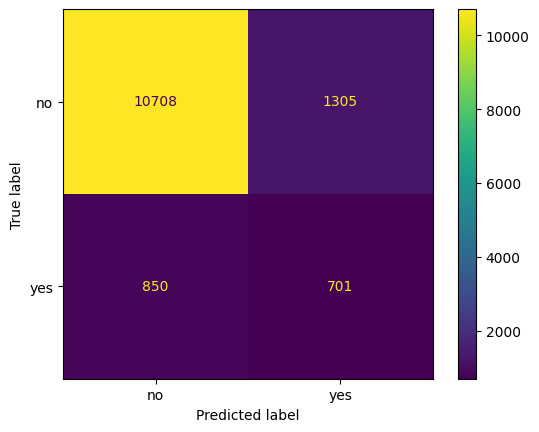

In [82]:
# Kontenjans tablosu sklearn.metrics içindeki confusion_matrix() ile elde edilmiştir
# “yes”, yani evet sınıfı pozitif sınıf olarak kabul edilmiştir.
# Ardından, kontenjans tablosunun görsel açıdan daha iyi biçimde oluşturulabilmesi için ConfusionMatrixDisplay() fonksiyonu kullanılmıştır.
my_cm=confusion_matrix(y_true=y_test,y_pred=y_tahmin,labels=["no","yes"])
my_cm_p=ConfusionMatrixDisplay(my_cm,display_labels=["no","yes"])
my_cm_p.plot()

In [85]:
# Kontenjans tablosundaki tn, tp, fn, fp değerlerinin sırasıyla aynı isimlerde tanımlanan değişkenlere atanabilmesi için my_cm.ravel() kullanılmıştır.
tn,fp,fn,tp=my_cm.ravel()
print("True Negatives",tn)
print("False Positive",fp)
print("False Negatives",fn)
print("True Positive",tp)


True Negatives 10708
False Positive 1305
False Negatives 850
True Positive 701


In [88]:
#  Bu bölümde classification_report() ile en temel performans değerlendirme ölçütleri elde edilmiştir.
my_report=classification_report(y_true=y_test,y_pred=y_tahmin,labels=["no","yes"])
print(my_report)

              precision    recall  f1-score   support

          no       0.93      0.89      0.91     12013
         yes       0.35      0.45      0.39      1551

    accuracy                           0.84     13564
   macro avg       0.64      0.67      0.65     13564
weighted avg       0.86      0.84      0.85     13564



In [89]:
# Yukarıda elde edilen performans metrikleri raporundan Naive Bayes Sınıflandırıcının doğruluğu %84 elde edilmiştir
#  Raporun ilk iki satırında hem no hem de yes sınıfının pozitif sınıf alınmasıyla elde edilen metrikler bulunmaktadır
# Duyarlılık, belirleyicilik, kesinlik, F-Ölçüsü gibi ölçütlerin değeri ve yorumunun pozitif sınıf değiştiğinde değişmekte olduğundan hangi sınıfın pozitif sınıf seçildiği ve yorumlandığı oldukça önemlidir.


`yes sınıfının pozitif sınıf seçilmiş olması durumunda;` gerçekte banka vadeli mevduatına abone olan müşteriler arasında, modelin doğru şekilde öngördüğü ve gerçekte de banka vadeli mevduatına abone olan müşterilerin oranı %45’tür (duyarlılık/recall). <br>
`no sınıfının pozitif sınıf seçilmiş olması durumunda;` gerçekte banka vadeli mevduatına abone olmayan müşteriler arasında, modelin doğru şekilde öngördüğü ve gerçekte de banka vadeli mevduatına abone olmayan müşterilerin oranı ise %89’tür (duyarlılık/recall).